In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r'D:/data')

In [3]:
onlinedata = pd.read_csv('online_retail.csv', sep = ',', dtype = {'Customer ID': str})

In [4]:
onlinedata.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010/12/1 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010/12/1 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010/12/1 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010/12/1 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010/12/1 8:26,3.39,17850,United Kingdom


In [5]:
onlinedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
Invoice        541910 non-null object
StockCode      541910 non-null object
Description    540456 non-null object
Quantity       541910 non-null int64
InvoiceDate    541910 non-null object
Price          541910 non-null float64
Customer ID    406830 non-null object
Country        541910 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [6]:
onlinedata.describe()

,Quantity,Price
count,541910.000000,541910.000000
mean,9.552234,4.611138
std,218.080957,96.759765
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [7]:
# showing all the orders that refunded
onlinedata[onlinedata['Invoice'].str[0] == 'C'] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010/12/1 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010/12/1 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010/12/1 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010/12/1 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010/12/1 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011/12/9 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011/12/9 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011/12/9 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011/12/9 11:58,1.25,17315,United Kingdom


# Data Cleansing

In [8]:
# showing missing valus contribution by rows
onlinedata.apply(lambda x:sum(x.isnull())/len(x), axis = 0)  

Invoice        0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.249266
Country        0.000000
dtype: float64

In [9]:
# droping rows having missing values
retail = onlinedata.dropna(how = 'any').copy()

In [10]:
# translating invoicedate into standard format 
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], errors = 'coerce')
retail['InvoiceDate'] = retail['InvoiceDate'].dt.date

In [11]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [12]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
Invoice        406830 non-null object
StockCode      406830 non-null object
Description    406830 non-null object
Quantity       406830 non-null int64
InvoiceDate    406830 non-null object
Price          406830 non-null float64
Customer ID    406830 non-null object
Country        406830 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


# Data Analysis and Visualization

In [13]:
import seaborn as sns
sns.set(style = 'darkgrid', context = 'notebook', font_scale = 1.2)

In [14]:
# checking how many quantity of products have been sold online from each country
retail[retail['Quantity']>0].groupby(retail['Country']).sum()['Quantity'].sort_values(ascending = False)

Country
United Kingdom          4269472
Netherlands              200937
EIRE                     140525
Germany                  119263
France                   111473
Australia                 84209
Sweden                    36083
Switzerland               30083
Spain                     27951
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16122
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Israel                     4046
Poland                     3684
Canada                     2763
Iceland                    2458
USA                        2458
Unspecified                1789
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671
Lithuania                   652


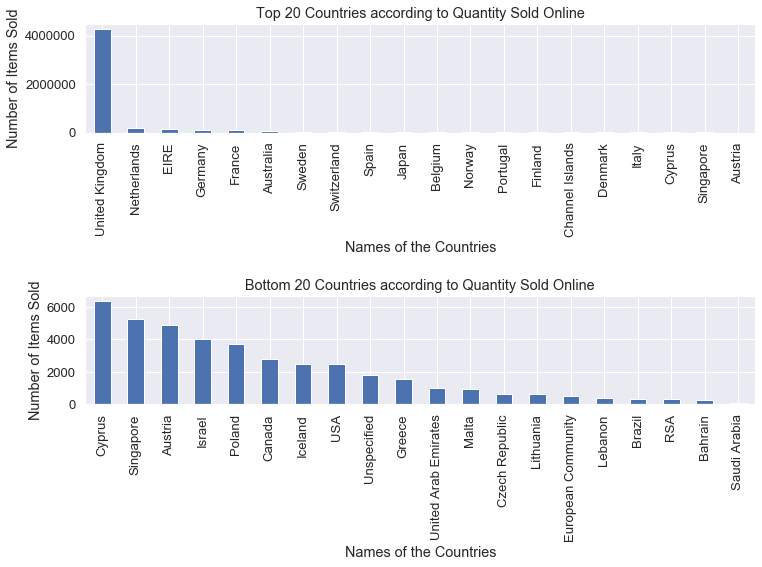

In [15]:
# having a look at the top/bottom 20 Countries in terms of Quantities according to the countries
plt.subplot(211)
retail[retail['Quantity']>0].groupby(retail['Country']).sum()['Quantity'].sort_values(ascending = False).head(20).plot.bar(figsize = (12,7))
plt.title('Top 20 Countries according to Quantity Sold Online')
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.subplot(212)
retail[retail['Quantity']>0].groupby(retail['Country']).sum()['Quantity'].sort_values(ascending = False).tail(20).plot.bar(figsize = (12,7))
plt.title('Bottom 20 Countries according to Quantity Sold Online')
plt.xlabel('Names of the Countries')
plt.ylabel('Number of Items Sold')
plt.subplots_adjust(hspace = 1.5)
plt.show()

In [16]:
# adding a column to the dataset : sales = price*quantity
retail['Sales'] = retail['Price'] * retail['Quantity']

In [17]:
# looking at each country's sales
retail['Sales'].groupby(retail['Country']).sum().sort_values(ascending = False)

Country
United Kingdom          6.767873e+06
Netherlands             2.846615e+05
EIRE                    2.502852e+05
Germany                 2.216982e+05
France                  1.967308e+05
Australia               1.370773e+05
Switzerland             5.573940e+04
Spain                   5.477458e+04
Belgium                 4.091096e+04
Sweden                  3.659591e+04
Japan                   3.534062e+04
Norway                  3.516346e+04
Portugal                2.905981e+04
Finland                 2.232674e+04
Channel Islands         2.008629e+04
Denmark                 1.876814e+04
Italy                   1.689051e+04
Cyprus                  1.294629e+04
Austria                 1.015432e+04
Singapore               9.120390e+03
Poland                  7.213140e+03
Israel                  6.994250e+03
Greece                  4.710520e+03
Iceland                 4.310000e+03
Canada                  3.666380e+03
Unspecified             2.667070e+03
Malta                   2.5054

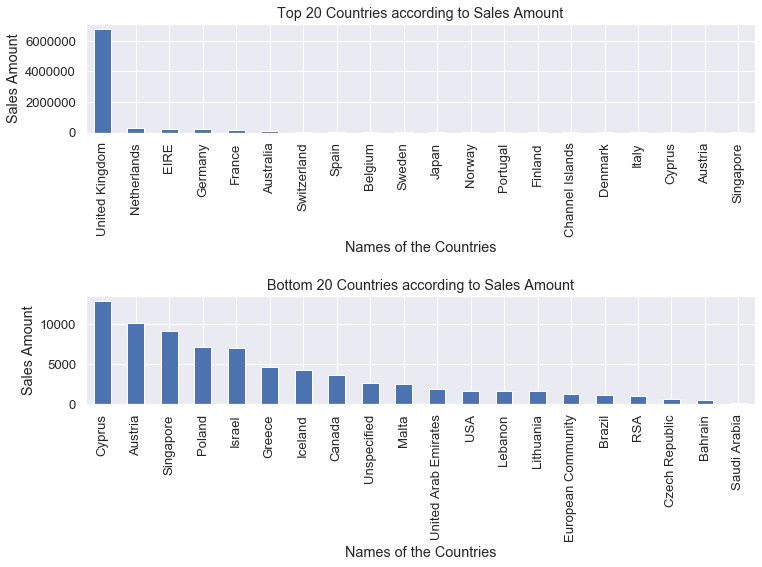

In [18]:
# looking at the top/bottom 20 countries sales
plt.subplot(211)
retail['Sales'].groupby(retail['Country']).sum().sort_values(ascending = False).head(20).plot.bar(figsize = (12,7))
plt.title('Top 20 Countries according to Sales Amount')
plt.xlabel('Names of the Countries')
plt.ylabel('Sales Amount')
plt.subplot(212)
retail['Sales'].groupby(retail['Country']).sum().sort_values(ascending = False).tail(20).plot.bar(figsize = (12,7))
plt.title('Bottom 20 Countries according to Sales Amount')
plt.xlabel('Names of the Countries')
plt.ylabel('Sales Amount')
plt.subplots_adjust(hspace = 1.5)
plt.show()

In [19]:
# looking at top 10 months according to online sales quantity
retail['month'] = pd.to_datetime(retail['InvoiceDate'], errors = 'coerce').dt.month

In [20]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Sales,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34,12


In [21]:
retail[retail['Quantity']>0].groupby(retail['month']).sum()['Quantity'].sort_values(ascending = False)

month
11    681888
12    599694
10    593908
9     544899
8     398938
5     373685
7     369432
6     363699
1     349147
3     348544
4     292225
2     265638
Name: Quantity, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

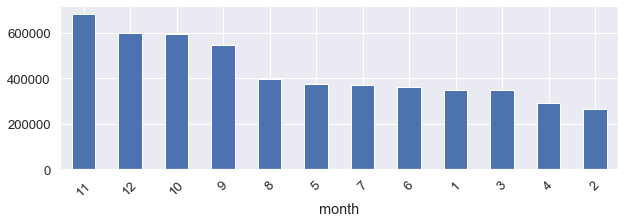

In [22]:
retail[retail['Quantity']>0].groupby(retail['month']).sum()['Quantity'].sort_values(ascending = False).plot.bar(figsize=(10,3))
plt.xticks(rotation=45)

In [23]:
# checking how many unique customer IDs are there

x = retail['Customer ID'].nunique()
print("There are {} number of different customers".format(x))

There are 4372 number of different customers


In [24]:
# checking different number of unique countries present in this dataset

y = retail['Country'].nunique()
print("There are {} number of different countries who do online retailing from UK".format(y))

There are 37 number of different countries who do online retailing from UK


In [25]:
# calculating average online spending amount for each customer
sumSales = retail[retail['Quantity']>0]['Sales'].sum()
customerNo = retail[retail['Quantity']>0]['Customer ID'].drop_duplicates().count()
avgSales = sumSales / customerNo
print(avgSales)

2053.7971661673196


In [26]:
# calculating the number of online shopping frequency/quantity/amounts for each customer on average
customer = retail[retail['Quantity']>0].groupby('Customer ID').agg({'Invoice': 'nunique',
                                                                    'Quantity': np.sum, 
                                                                    'Sales': np.sum})
customer.head()

,Invoice,Quantity,Sales
Customer ID,,,
12346,1,74215,77183.60
12347,7,2458,4310.00
12348,4,2341,1797.24
12349,1,631,1757.55
12350,1,197,334.40


In [27]:
customer.describe()

,Invoice,Quantity,Sales
count,4339.000000,4339.000000,4339.000000
mean,4.271952,1194.214566,2053.797166
std,7.705493,5055.603014,8988.247836
min,1.000000,1.000000,0.000000
25%,1.000000,160.000000,307.245000
50%,2.000000,379.000000,674.450000
75%,5.000000,993.000000,1661.640000
max,210.000000,197491.000000,280206.020000


# Data Preparation
In the following we are going to analysis the Customers based on below 3 factors:
R (Recency): Number of days since last purchase
F (Frequency): Number of tracsactions
M (Monetary): Total amount of transactions (revenue contributed)

In [28]:
# data preparation 
df = pd.read_csv('online_retail.csv', sep = ',', dtype = {'Customer ID': str})
df.drop(['Description'], axis = 1, inplace = True)
df.apply(lambda x:sum(x.isnull())/len(x), axis = 0) 
df['Customer ID'] = df['Customer ID'].fillna('unknown')
df['amount'] = df['Quantity'] * df['Price']

In [29]:
df['date'] = [x.split(' ')[0] for x in df['InvoiceDate']]
df['time'] = [x.split(' ')[1] for x in df['InvoiceDate']]

In [30]:
df.drop(['InvoiceDate'], axis = 1, inplace = True)
df['date'] = pd.to_datetime(df['date'])

In [31]:
df = df.drop_duplicates()

In [32]:
df1 = df[(df['Quantity']>0) & (df['Price']>0)]  # eliminating negative values for refunding orders

In [33]:
# Attibute Recency
recency = ( df1['date'].max() - df1.groupby('Customer ID')['date'].max()).dt.days

In [34]:
# attribute frequency
frequency = df1.groupby('Customer ID')['Invoice'].nunique()

In [35]:
# Attribute : Monetary
amount = df1.groupby('Customer ID')['amount'].sum()

In [36]:
# Merge tha dataframes to get the final RFM dataframe
rfm = pd.concat ([recency, frequency, amount] , axis = 1)
rfm.columns = ['recency','frequency','amount']

In [37]:
rfm.head()

,recency,frequency,amount
Customer ID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40


Text(0.5, 0, 'Attributes')

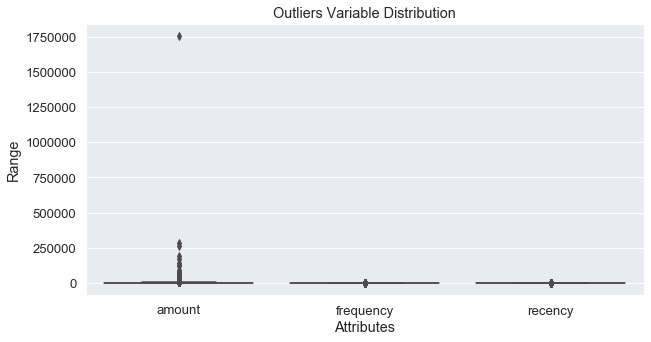

In [38]:
# Outlier Analysis
attributes = ['amount','frequency','recency']
plt.figure(figsize = (10,5))
sns.boxplot(data = rfm[attributes])
plt.title("Outliers Variable Distribution")
plt.ylabel("Range")
plt.xlabel("Attributes")

In [39]:
# Removing outliers for amount
Q1 = rfm.amount.quantile(0.05)
Q3 = rfm.amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.amount >= Q1 - 1.5*IQR) & (rfm.amount <= Q3 + 1.5*IQR)]

# Removing outliers for recency
Q1 = rfm.recency.quantile(0.05)
Q3 = rfm.recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.recency >= Q1 - 1.5*IQR) & (rfm.recency <= Q3 + 1.5*IQR)]

# Removing outliers for frequency
Q1 = rfm.frequency.quantile(0.05)
Q3 = rfm.frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.frequency >= Q1 - 1.5*IQR) & (rfm.frequency <= Q3 + 1.5*IQR)]

# Data Clustering
In the following we will use K-means clustering algorithm.
First we initialize k points, called means, randomly.
Then We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
Finally We repeat the process for a given number of iterations and at the end, we have our clusters.

In [40]:
# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [41]:
# Rescaling the Attributes using standardisation scaling
rfm1 = rfm[['amount', 'frequency', 'recency']]
scaler = StandardScaler()
rfm1_scaled = scaler.fit_transform(rfm1)
rfm1_scaled.shape

(4261, 3)

In [42]:
rfm1_scaled = pd.DataFrame(rfm1_scaled)
rfm1_scaled.columns = ['amount', 'frequency', 'recency']
rfm1_scaled.head()

,amount,frequency,recency
0,1.654737,0.871389,-0.912588
1,0.264620,0.094721,-0.183198
2,0.242662,-0.681946,-0.752722
3,-0.544657,-0.681946,2.164838
4,0.656745,1.130278,-0.572872


In [43]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters = 5, max_iter=50)
kmeans.fit(rfm1_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [44]:
kmeans.labels_

array([1, 2, 0, ..., 0, 1, 2])

In [ ]:
# To Find the Optimal Number of Clusters

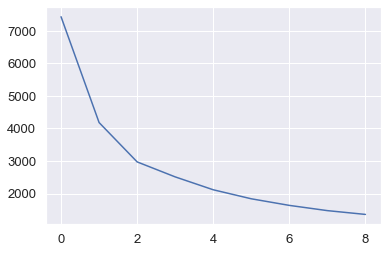

In [45]:
# Elbow Curve/ SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm1_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [57]:
# Silhouette Analysis : silhouette score = (p−q) /max(p,q)
# p  is the mean distance to the points in the nearest cluster that the data point is not a part of
# q  is the mean intra-cluster distance to all the points in its own cluster.
# A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
# A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm1_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm1_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5452469048920738
For n_clusters=3, the silhouette score is 0.5112517880231175
For n_clusters=4, the silhouette score is 0.4871322623140314
For n_clusters=5, the silhouette score is 0.4416301538167843
For n_clusters=6, the silhouette score is 0.416863117361052
For n_clusters=7, the silhouette score is 0.4176963599700083
For n_clusters=8, the silhouette score is 0.3857620721135733
For n_clusters=9, the silhouette score is 0.38984601354935783
For n_clusters=10, the silhouette score is 0.3563505513543703


In [47]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm1_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
 kmeans.labels_

array([2, 1, 1, ..., 1, 2, 1])

In [49]:
# assign the label
rfm['Cluster_labels'] = kmeans.labels_
rfm.head()

,recency,frequency,amount,Cluster_labels
Customer ID,,,,
12347,2,7,4310.00,2
12348,75,4,1797.24,1
12349,18,1,1757.55,1
12350,310,1,334.40,0
12352,36,8,2506.04,1


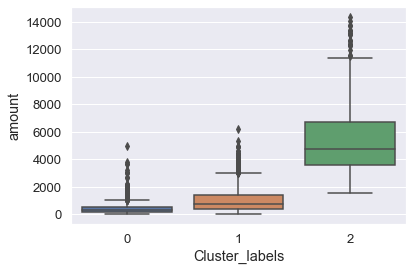

In [50]:
# Box plot to visualize Cluster_labels vs amount

sns.boxplot(x='Cluster_labels', y='amount', data=rfm)

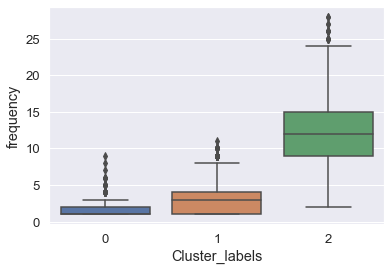

In [51]:
# Box plot to visualize Cluster_labels vs frequency

sns.boxplot(x='Cluster_labels', y='frequency', data=rfm)

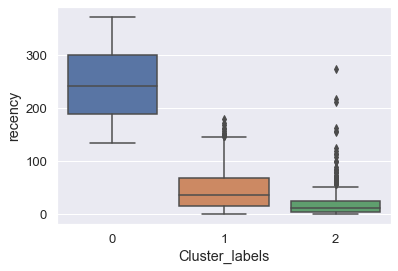

In [52]:
# Box plot to visualize Cluster_labels vs recency

sns.boxplot(x='Cluster_labels', y='recency', data=rfm)

In [53]:
def trans_values(x):
    if x == 0:
        return 'potential high value customers'
    elif x== 1:
        return 'recent low value customers'
    else:
        return 'least important customers'

rfm['customer_category'] = rfm['Cluster_labels'].apply(trans_values)
rfm.head()

,recency,frequency,amount,Cluster_labels,customer_category
Customer ID,,,,,
12347,2,7,4310.00,2,least important customers
12348,75,4,1797.24,1,recent low value customers
12349,18,1,1757.55,1,recent low value customers
12350,310,1,334.40,0,potential high value customers
12352,36,8,2506.04,1,recent low value customers


In [54]:
df2 = rfm['customer_category'].value_counts()
df2

recent low value customers        2771
potential high value customers    1062
least important customers          428
Name: customer_category, dtype: int64

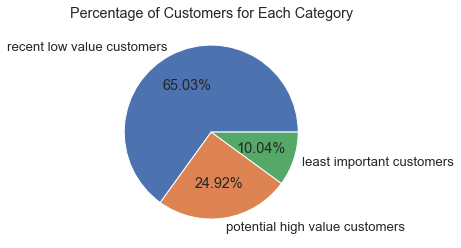

In [55]:
plt.pie(x = df2.values, labels = df2.index, autopct= '%0.2f%%')
plt.title('Percentage of Customers for Each Category')
plt.show()

# Conclusion
1. Customers with Cluster label 0 are the customers with high amount and high frequency of transactions as compared to other customers.
   They are potential high value customers whom we need to maintain good relationship with. There are 10.04% of them among all the customers.
2. Customers with Cluster label 1 are recent buyers with low amount and low frequency of transcations. 
   They are recent low value customers that we could develop in the near future. There are 24.92% of them.
3. Customers with Cluster label 2 are past customers with low amount and low frequency of transaction and hence least of importance from business point of view. There are 65.03% of them among all the customers.